# Linear Regression

TA: Sibel Kapan

Reference : https://www.kaggle.com/code/codeblogger/machine-learning-tutorial-linear-regression/notebook

Import the necessary packages

In [91]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

plt.style.use("seaborn-whitegrid")
warnings.filterwarnings("ignore")

Upload the data

In [92]:
from google.colab import files
data = files.upload()

Saving insurance.csv to insurance (2).csv


In [93]:
data = '/content/insurance.csv'
df = pd.read_csv(data, header=None)

Check the data, we can see that coloumn names are saved as data. In Kaggle source, there is no such a problem. We couldn't read the csv file correctly. We are going the fix this problem.

In [94]:
df.head(10)

,0,1,2,3,4,5,6
0,age,sex,bmi,children,smoker,region,charges
1,19,female,27.9,0,yes,southwest,16884.924
2,18,male,33.77,1,no,southeast,1725.5523
3,28,male,33,3,no,southeast,4449.462
4,33,male,22.705,0,no,northwest,21984.47061
5,32,male,28.88,0,no,northwest,3866.8552
6,31,female,25.74,0,no,southeast,3756.6216
7,46,female,33.44,1,no,southeast,8240.5896
8,37,female,27.74,3,no,northwest,7281.5056
9,37,male,29.83,2,no,northeast,6406.4107


In [95]:
col_names = ['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges']

df.columns = col_names

df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [96]:
df = df.iloc[1:]

In [97]:
df.head(10)

,age,sex,bmi,children,smoker,region,charges
1,19,female,27.9,0,yes,southwest,16884.924
2,18,male,33.77,1,no,southeast,1725.5523
3,28,male,33,3,no,southeast,4449.462
4,33,male,22.705,0,no,northwest,21984.47061
5,32,male,28.88,0,no,northwest,3866.8552
6,31,female,25.74,0,no,southeast,3756.6216
7,46,female,33.44,1,no,southeast,8240.5896
8,37,female,27.74,3,no,northwest,7281.5056
9,37,male,29.83,2,no,northeast,6406.4107
10,60,female,25.84,0,no,northwest,28923.13692


Types of the data is change also. age, children, bmi and charges data types are converted the correct type.

In [98]:
print (df.dtypes)

age         object
sex         object
bmi         object
children    object
smoker      object
region      object
charges     object
dtype: object


In [99]:
df['age'] = df['age'].astype(str).astype(np.int64)
df['children'] = df['children'].astype(str).astype(np.int64)
df['bmi'] = df['bmi'].astype(str).astype(np.float64)
df['charges'] = df['charges'].astype(str).astype(np.float64)

In [100]:
print (df.dtypes)

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object


In [101]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 1 to 1338
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


Check if there is a null value.

In [103]:
df.columns[df.isnull().any()]

Index([], dtype='object')

There is no missing value in the data.

In [104]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

## Examine the Data 

In [105]:
data = df.copy()
data = data.select_dtypes(include=["float64","int64"])
data.head()

,age,bmi,children,charges
1,19,27.900,0,16884.92400
2,18,33.770,1,1725.55230
3,28,33.000,3,4449.46200
4,33,22.705,0,21984.47061
5,32,28.880,0,3866.85520


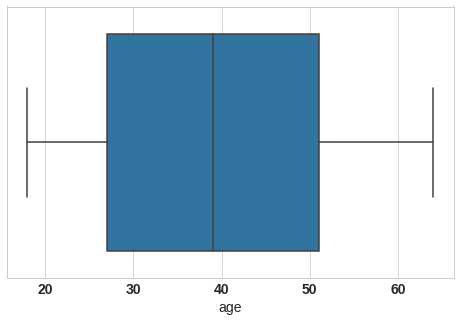

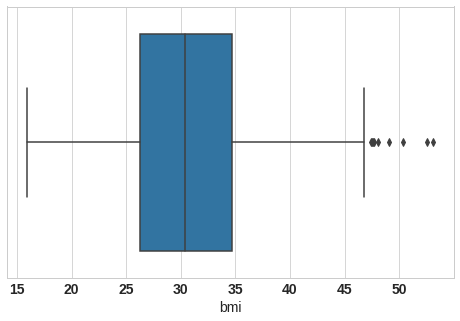

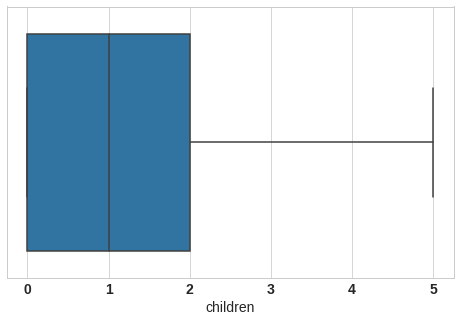

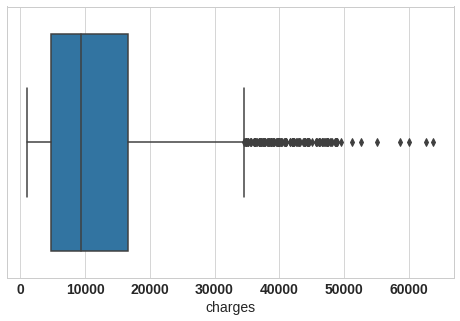

In [106]:
column_list = ['age', 'bmi', 'children', 'charges']
for col in column_list:
    sns.boxplot(x = data[col])
    plt.xlabel(col)
    plt.show()

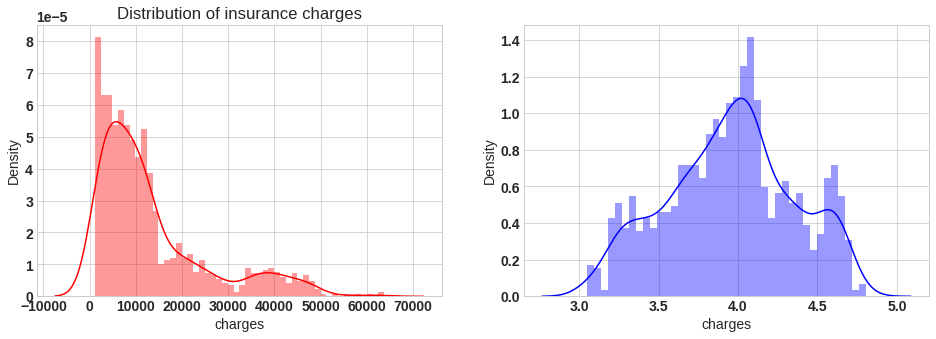

In [107]:
f= plt.figure(figsize=(16,5))

ax=f.add_subplot(121)
sns.distplot(df['charges'],bins=50,color='r',ax=ax)
ax.set_title('Distribution of insurance charges')

ax=f.add_subplot(122)
sns.distplot(np.log10(df['charges']),bins=40,color='b',ax=ax)

plt.show()

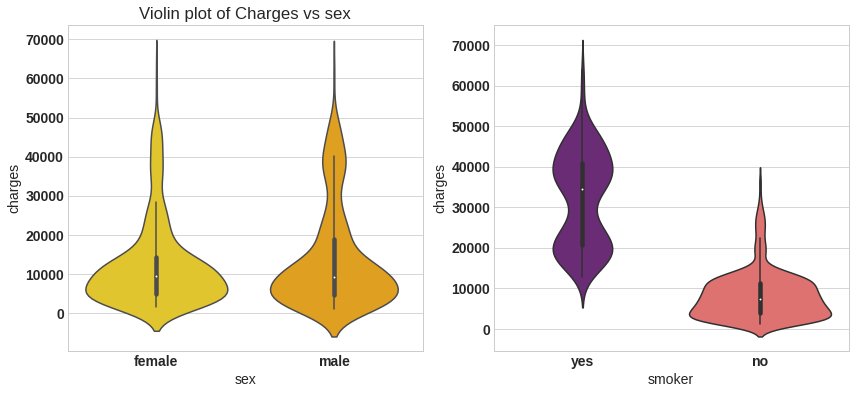

In [108]:
f = plt.figure(figsize=(14,6))
ax = f.add_subplot(121)
sns.violinplot(x='sex', y='charges',data=df,palette='Wistia',ax=ax)
ax.set_title('Violin plot of Charges vs sex')

ax = f.add_subplot(122)
sns.violinplot(x='smoker', y='charges',data=df,palette='magma',ax=ax)

plt.show()

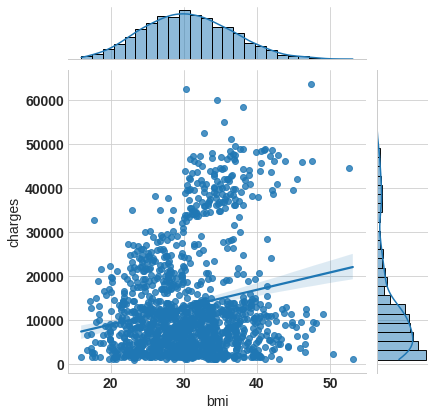

In [109]:
sns.jointplot(x="bmi",y="charges",data=df,kind="reg")
plt.show()

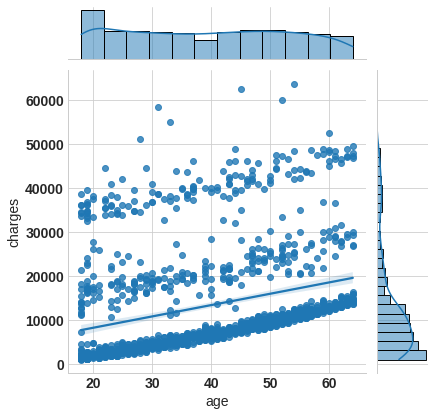

In [110]:
sns.jointplot(x="age",y="charges",data=df,kind="reg")
plt.show()

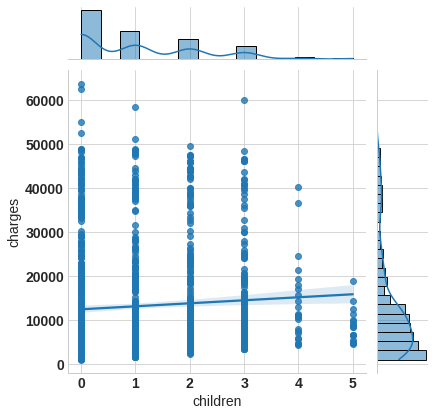

In [111]:
sns.jointplot(x="children",y="charges",data=df,kind="reg")
plt.show()

## Preprocessing

In [112]:
# import the necessary packages
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from scipy.stats import boxcox
from sklearn import metrics


Label encoder used for categorical data. Also, you can use Dummy variables (get_dummies() func.). Check the reference.

In [113]:
# Import label encoder
from sklearn import preprocessing
  
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column 'sex', 'smoker','region' .
df['sex']= label_encoder.fit_transform(df['sex'])
df['smoker']= label_encoder.fit_transform(df['smoker'])
df['region']= label_encoder.fit_transform(df['region'])


In [114]:
df.head(5)

,age,sex,bmi,children,smoker,region,charges
1,19,0,27.900,0,1,3,16884.92400
2,18,1,33.770,1,0,2,1725.55230
3,28,1,33.000,3,0,2,4449.46200
4,33,1,22.705,0,0,1,21984.47061
5,32,1,28.880,0,0,1,3866.85520


Normalize the *charges* for data consistancy and speed.

In [115]:
y_bc,lam, ci= boxcox(df['charges'],alpha=0.05)
df['charges'] = np.log(df['charges'])

In [116]:
df.head(5)

,age,sex,bmi,children,smoker,region,charges
1,19,0,27.900,0,1,3,9.734176
2,18,1,33.770,1,0,2,7.453302
3,28,1,33.000,3,0,2,8.400538
4,33,1,22.705,0,0,1,9.998092
5,32,1,28.880,0,0,1,8.260197


## Training and Testing

In [ ]:
X = df.drop('charges',axis=1) 
y = df['charges']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=23)

In [117]:
X = df['bmi'].values.reshape(-1,1)  # Independet variable
y = df['charges'] # dependent variable

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)

lin_reg = LinearRegression()
model = lin_reg.fit(X_train,y_train) #train the model by fit method
predictions = lin_reg.predict(X_test)  #test the data with model

print("intercept: ", model.intercept_)
print("coef: ", model.coef_)
print("RScore. ", model.score(X_test,y_test))

intercept:  8.516475260729866
coef:  [0.01940078]
RScore.  0.01983303930101199


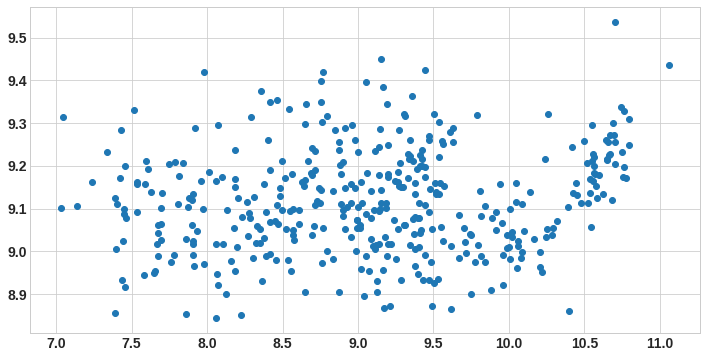

In [118]:
plt.figure(figsize=(12,6))
plt.scatter(y_test,predictions)
plt.show()

In [119]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 0.7416080756500886
MSE: 0.8207921927483801
RMSE: 0.9059758234899981


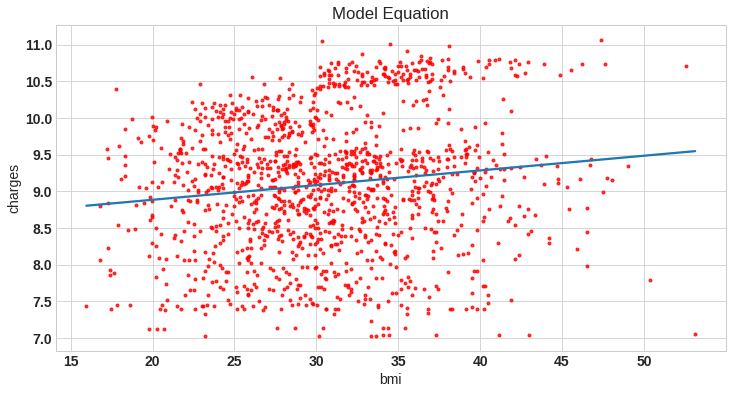

In [120]:
plt.figure(figsize=(12,6))
g = sns.regplot(x=df['bmi'],y=df["charges"],ci=None,scatter_kws = {'color':'r','s':9})
g.set_title("Model Equation")
g.set_ylabel("charges")
g.set_xlabel('bmi')
plt.show()

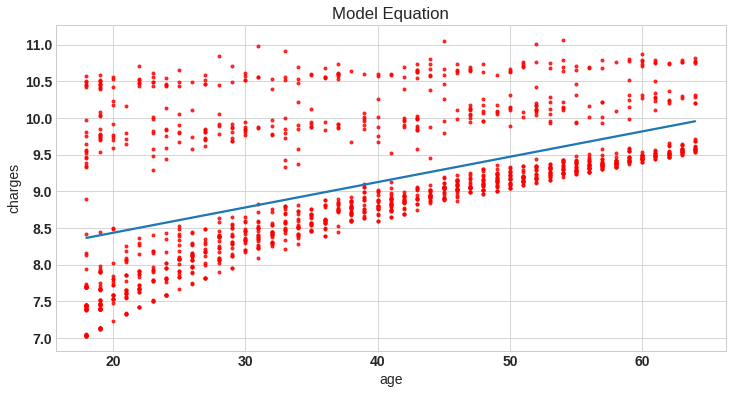

In [121]:
plt.figure(figsize=(12,6))
g = sns.regplot(x=df['age'],y=df["charges"],ci=None,scatter_kws = {'color':'r','s':9})
g.set_title("Model Equation")
g.set_ylabel("charges")
g.set_xlabel('age')
plt.show()